In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df = pd.read_csv('airlines_flights_data.csv')

In [98]:
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [99]:
df = df.drop(['index'], axis=1)
df = df.dropna()

In [100]:
df.shape

(300153, 11)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [102]:
df.isna().sum()

,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0


In [103]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [104]:
cor = df.select_dtypes(include=np.number).corr()

In [105]:
cor

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


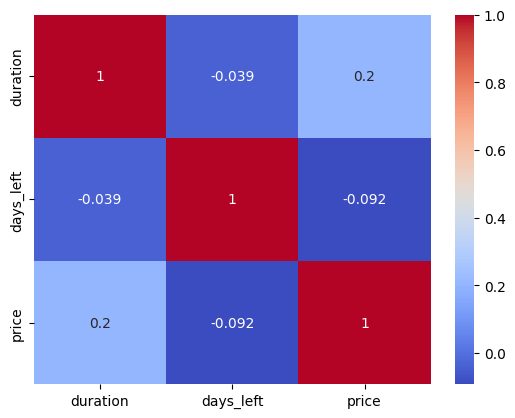

In [106]:
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.show()

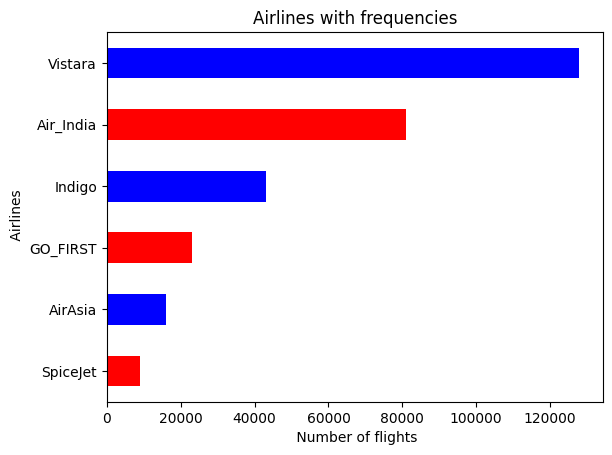

In [107]:
df['airline'].value_counts(ascending=True).plot.barh( color = ['red', 'blue'])
plt.title("Airlines with frequencies")
plt.xlabel(" Number of flights")
plt.ylabel(" Airlines")
plt.show()

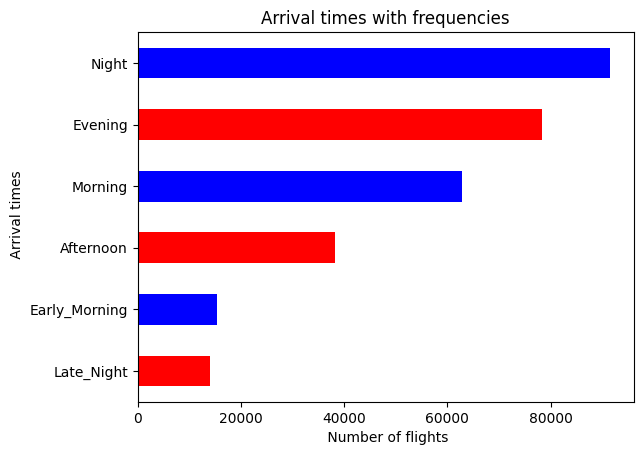

In [108]:
df['arrival_time'].value_counts(ascending=True).plot.barh( color = ['red', 'blue'])
plt.title("Arrival times with frequencies")
plt.xlabel(" Number of flights")
plt.ylabel(" Arrival times")
plt.show()

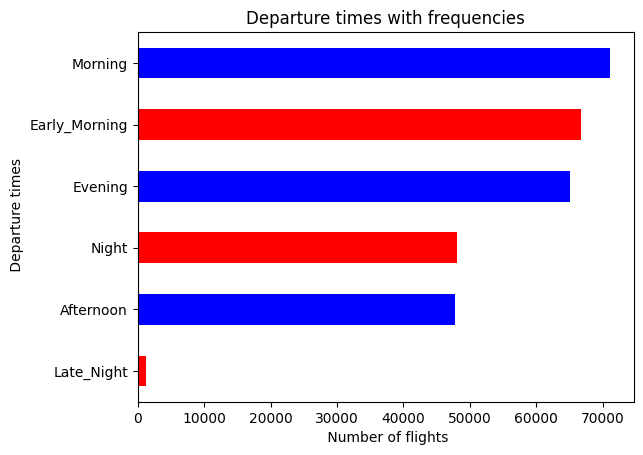

In [109]:
df['departure_time'].value_counts(ascending=True).plot.barh( color = ['red', 'blue'])
plt.title("Departure times with frequencies")
plt.xlabel(" Number of flights")
plt.ylabel(" Departure times")
plt.show()

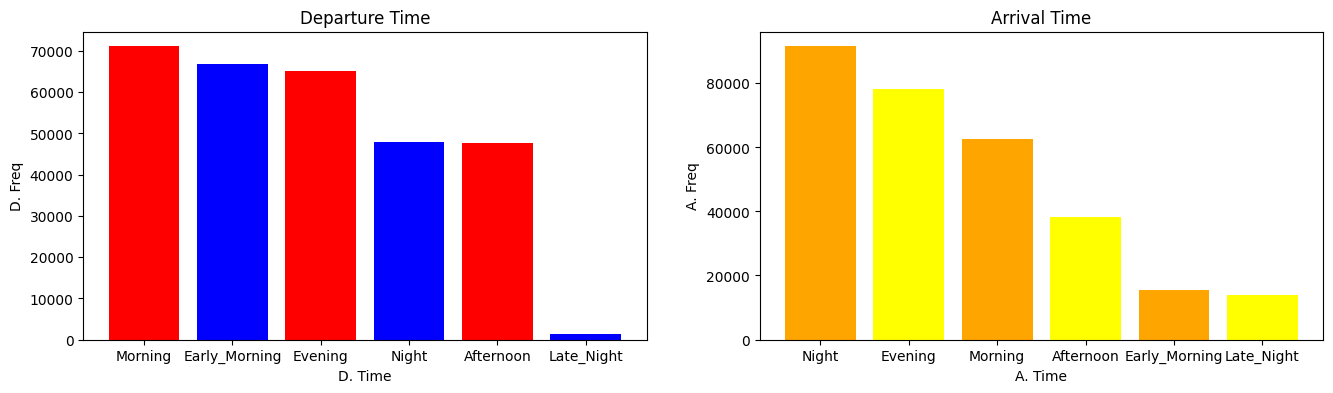

In [110]:
plt.figure(figsize = (16,4))

plt.subplot(1,2,1)

plt.bar( df['departure_time'].value_counts().index , df['departure_time'].value_counts().values, color = ['r', 'b'] )
plt.title("Departure Time")
plt.xlabel("D. Time")
plt.ylabel("D. Freq")

plt.subplot(1,2,2)

plt.bar( df['arrival_time'].value_counts().index, df['arrival_time'].value_counts().values, color = ['orange', 'yellow'])
plt.title("Arrival Time")
plt.xlabel("A. Time")
plt.ylabel("A. Freq")

plt.show()

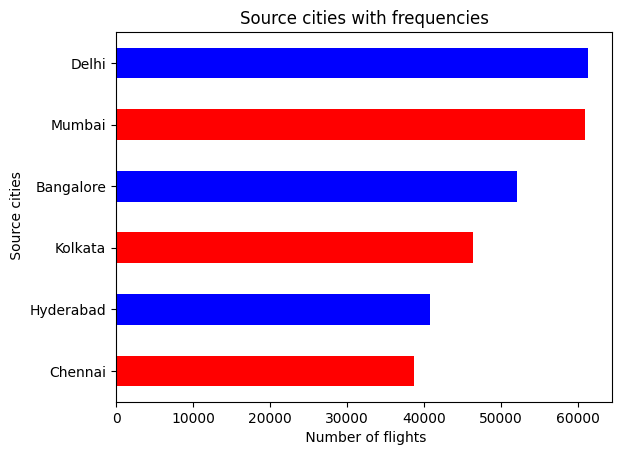

In [111]:
df['source_city'].value_counts(ascending=True).plot.barh( color = ['red', 'blue'])
plt.title("Source cities with frequencies")
plt.xlabel(" Number of flights")
plt.ylabel(" Source cities")
plt.show()

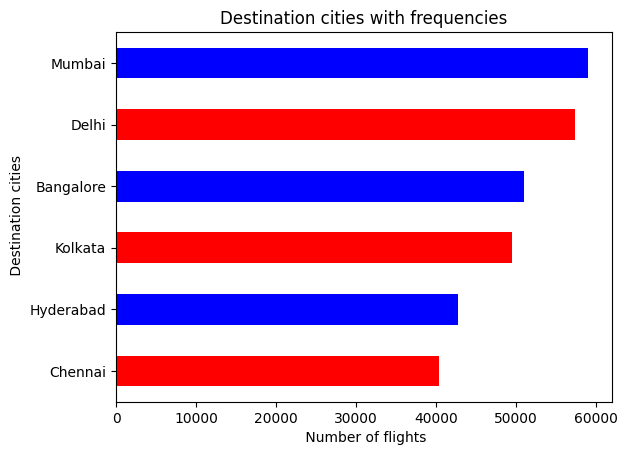

In [112]:
df['destination_city'].value_counts(ascending=True).plot.barh( color = ['red', 'blue'])
plt.title("Destination cities with frequencies")
plt.xlabel(" Number of flights")
plt.ylabel(" Destination cities")
plt.show()

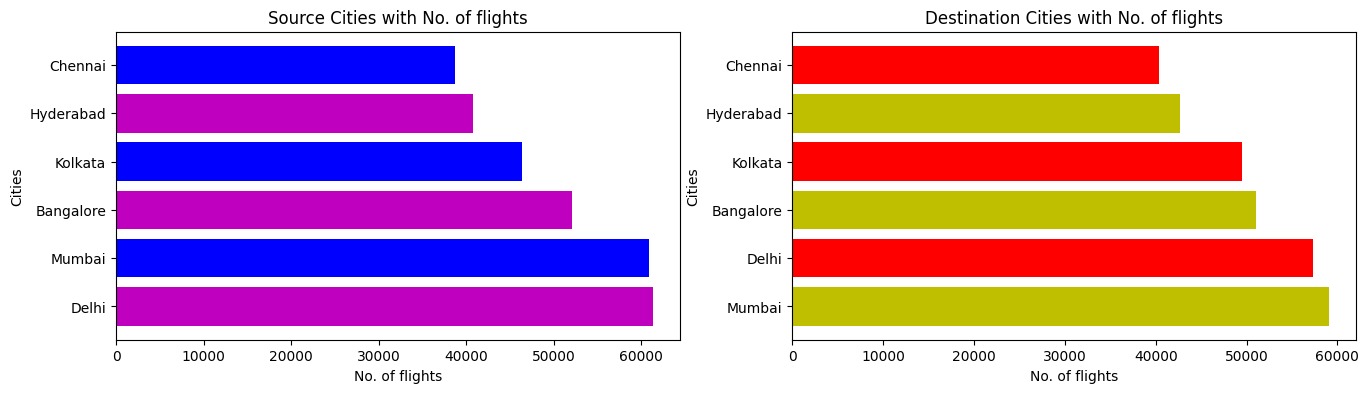

In [113]:
plt.figure( figsize= (16,4))

plt.subplot(1,2,1)

plt.barh( df['source_city'].value_counts().index , df['source_city'].value_counts().values, color = ['m', 'b'])
plt.title("Source Cities with No. of flights")
plt.ylabel("Cities")
plt.xlabel("No. of flights")

plt.subplot(1,2,2)

plt.barh( df['destination_city'].value_counts().index , df['destination_city'].value_counts().values, color = ['y', 'r'])
plt.title("Destination Cities with No. of flights")
plt.ylabel("Cities")
plt.xlabel("No. of flights")

plt.show()

In [114]:
df.groupby('airline')['price'].mean()

,price
airline,
AirAsia,4091.072742
Air_India,23507.019112
GO_FIRST,5652.007595
Indigo,5324.216303
SpiceJet,6179.278881
Vistara,30396.536302


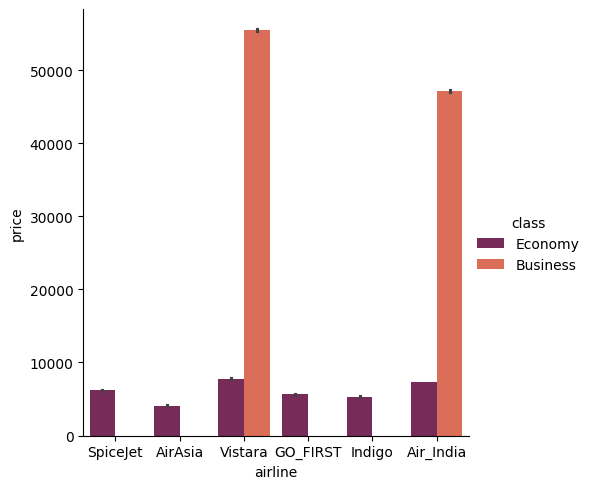

In [115]:
sns.catplot( x = 'airline', y = 'price', kind = 'bar', palette = 'rocket', data = df, hue = 'class')
plt.show()

In [116]:
df.groupby('days_left')['price'].mean()

,price
days_left,
1,21591.867151
2,30211.299801
3,28976.083569
4,25730.905653
5,26679.773368
6,24856.493902
7,25588.367351
8,24895.883995
9,25726.246072


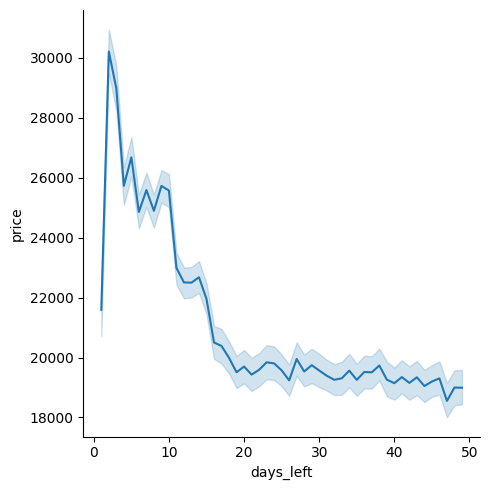

In [117]:
sns.relplot( y='price', x = 'days_left', kind = 'line', data = df )
plt.show()

In [118]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, KFold

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

In [119]:
Label_Encoder = LabelEncoder()
label_cols = ["airline", "flight", "source_city","destination_city"]

for col in label_cols:
    df[col] = Label_Encoder.fit_transform(df[col])

Ordinal_Encoder1 = OrdinalEncoder(categories = [["Early_Morning", "Morning", "Afternoon", "Evening", "Night", "Late_Night"]])
Ordinal_Encoder2 = OrdinalEncoder(categories = [["zero", "one", "two_or_more"]])
Ordinal_Encoder3 = OrdinalEncoder(categories = [["Early_Morning", "Morning", "Afternoon", "Evening", "Night", "Late_Night"]])
Ordinal_Encoder4 = OrdinalEncoder(categories = [["Economy", "Business"]])

ordinal_cols = ["departure_time", "stops", "arrival_time", "class"]

df["departure_time"] = Ordinal_Encoder1.fit_transform(df[["departure_time"]])
df["stops"] = Ordinal_Encoder2.fit_transform(df[["stops"]])
df["arrival_time"]  = Ordinal_Encoder3.fit_transform(df[["arrival_time"]])
df["class"] = Ordinal_Encoder4.fit_transform(df[["class"]])

In [120]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,3.0,0.0,4.0,5,0.0,2.17,1,5953
1,4,1387,2,0.0,0.0,1.0,5,0.0,2.33,1,5953
2,0,1213,2,0.0,0.0,0.0,5,0.0,2.17,1,5956
3,5,1559,2,1.0,0.0,2.0,5,0.0,2.25,1,5955
4,5,1549,2,1.0,0.0,1.0,5,0.0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,5,1477,1,1.0,1.0,3.0,3,1.0,10.08,49,69265
300149,5,1481,1,2.0,1.0,4.0,3,1.0,10.42,49,77105
300150,5,1486,1,0.0,1.0,4.0,3,1.0,13.83,49,79099
300151,5,1483,1,0.0,1.0,3.0,3,1.0,10.00,49,81585


In [121]:
X = df.drop("price", axis = 1)
Y = df["price"]

In [122]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
cb = CatBoostRegressor()
xg = XGBRegressor()

In [123]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

## LinearRegression

In [124]:
lr = lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [127]:
# r2
accuracy_lr = r2_score(y_test, y_pred)
print(accuracy_lr*100)

90.63195841967811


In [128]:
# mse
mse_lr = mean_squared_error(y_test, y_pred)
print(mse_lr)

48290593.72712059


## DecisionTreeRegression

In [129]:
dt = dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

In [130]:
# r2
accuracy_dt = r2_score(y_test, y_pred)
print(accuracy_dt*100)

98.376054490805


In [131]:
# mse
mse_dt = mean_squared_error(y_test, y_pred)
print(mse_dt)

8371151.232317932


## RandomForestRegression

In [132]:
rf = rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [133]:
# r2
accuracy_rf = r2_score(y_test, y_pred)
print(accuracy_rf*100)

98.99320592711777


In [134]:
# mse
mse_rf = mean_squared_error(y_test, y_pred)
print(mse_rf)

5189844.977050001


## catboostRegression

In [135]:
cb = cb.fit(x_train, y_train)
y_pred = cb.predict(x_test)

Learning rate set to 0.097339
0:	learn: 20638.9410575	total: 105ms	remaining: 1m 44s
1:	learn: 18795.4738890	total: 138ms	remaining: 1m 8s
2:	learn: 17135.2440872	total: 170ms	remaining: 56.7s
3:	learn: 15655.0116015	total: 202ms	remaining: 50.2s
4:	learn: 14338.0096158	total: 232ms	remaining: 46.1s
5:	learn: 13153.8232184	total: 262ms	remaining: 43.4s
6:	learn: 12098.9824604	total: 294ms	remaining: 41.6s
7:	learn: 11169.4025071	total: 325ms	remaining: 40.3s
8:	learn: 10350.1969704	total: 355ms	remaining: 39.1s
9:	learn: 9626.2746446	total: 389ms	remaining: 38.5s
10:	learn: 8991.8287773	total: 420ms	remaining: 37.7s
11:	learn: 8436.2381202	total: 451ms	remaining: 37.1s
12:	learn: 7946.8200785	total: 482ms	remaining: 36.6s
13:	learn: 7511.6147548	total: 513ms	remaining: 36.2s
14:	learn: 7140.9424140	total: 545ms	remaining: 35.8s
15:	learn: 6822.6548000	total: 576ms	remaining: 35.4s
16:	learn: 6537.6812464	total: 615ms	remaining: 35.6s
17:	learn: 6300.8075597	total: 670ms	remaining: 36.5

In [136]:
# r2
accuracy_cb = r2_score(y_test, y_pred)
print(accuracy_cb*100)

98.14825982173852


In [137]:
# mse
mse_cb = mean_squared_error(y_test, y_pred)
print(mse_cb)

9545392.371490624


## XGBoostRegression

In [138]:
xg = xg.fit(x_train, y_train)
y_pred = xg.predict(x_test)

In [139]:
# r2
accuracy_xg = r2_score(y_test, y_pred)
print(accuracy_xg*100)

98.2373297214508


In [140]:
# mse
mse_xg = mean_squared_error(y_test, y_pred)
print(mse_xg)

9086262.0


In [149]:
models = {
    "Linear Regression": [accuracy_lr*100],
    "Decision Tree": [accuracy_dt*100],
    "Random Forest": [accuracy_rf*100],
    "CatBoost": [accuracy_cb*100],
    "XGBoost": [accuracy_xg*100]
}
results_df = pd.DataFrame(models)
results_df.T

,0
Linear Regression,90.631958
Decision Tree,98.376054
Random Forest,98.993206
CatBoost,98.148260
XGBoost,98.237330


/tmp/ipython-input-892965749.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.T.index, y=results_df.T[0], palette='viridis')


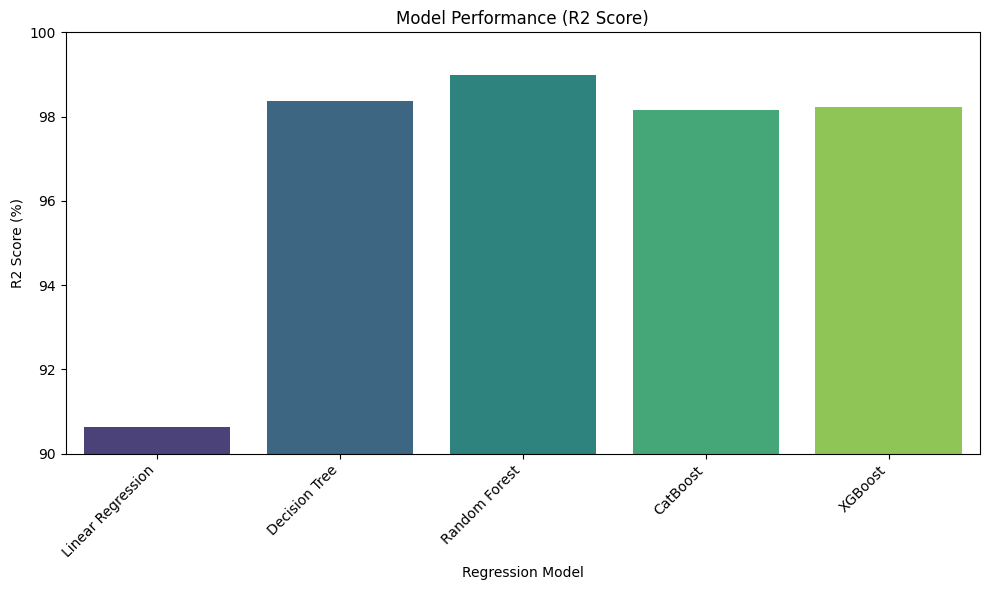

In [150]:
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.T.index, y=results_df.T[0], palette='viridis')
plt.title('Model Performance (R2 Score)')
plt.xlabel('Regression Model')
plt.ylabel('R2 Score (%)')
plt.ylim(90, 100)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Conclusion

Based on the R2 scores calculated, the **Random Forest Regression** model appears to be the best performing model with the highest R2 score of 98.99%, indicating that it explains approximately 98.99% of the variance in the price.

The other models also performed well, with Decision Tree, XGBoost, and CatBoost having R2 scores above 98.14%. Linear Regression had the lowest R2 score at 90.63%.